In [89]:
import os
import sys
import json
import numpy as np
import pandas as pd
import visual_utills
from datetime import datetime
from collections import Counter
import matplotlib.pyplot as plt
from visual_utills import VisualizeData
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
config_file = '../configs/config_shiva.json'
config = json.load(open(config_file))

In [3]:
data_dir = config['data_dir']
raw_dir = "{}/{}".format(data_dir, config['raw_data_dir'])
csv_dir = "{}/{}".format(data_dir, config['raw_data_csv'])
ltsf = "{}/ltsf".format(data_dir)

In [4]:
instrument_file = "{}/{}".format(data_dir, config['stock_meta'])
instrumen_config = json.load(open(instrument_file, "r"))
instrumen_config = {i['instrument_token']: i for i in instrumen_config}

In [5]:
file = os.listdir(ltsf)[0]
file

'03_23.csv'

In [6]:
df = pd.read_csv("{}/{}".format(csv_dir, file))

In [8]:
df.head(3)

,date,2831361_open,2831361_high,2831361_low,2831361_close,2831361_volume,2831361_avg,2029313_open,2029313_high,2029313_low,...,5582849_low,5582849_close,5582849_volume,5582849_avg,2236417_open,2236417_high,2236417_low,2236417_close,2236417_volume,2236417_avg
0,2023-03-27 09:15:00,449.15,454.95,446.2,446.7,281.0,449.25,50.55,50.55,50.25,...,1105.65,1113.05,9214,1110.9875,58.7,58.7,57.35,57.55,1113.0,58.075
1,2023-03-27 09:16:00,446.70,446.70,446.7,446.7,0.0,446.70,50.50,50.55,50.40,...,1111.70,1112.00,2289,1112.6250,57.8,57.8,57.80,57.80,200.0,57.800
2,2023-03-27 09:17:00,446.70,447.70,446.7,446.7,104.0,446.95,50.50,50.50,50.50,...,1111.70,1112.40,2725,1112.4000,57.8,57.8,57.50,57.50,40.0,57.650


In [139]:
visual_utills.help()

--------------------Class Parameters--------------------

sort_by             Sort by mean_vol, mean_price, mean_trade_value, price_std, vol_std, missing_values
reverse             Reverse the sort order

--------------------Plot Parameters--------------------

samples             Number of samples to plot
name_start          Plot only those stocks whose name starts with this string
day_separation      Plot vertical lines for each day


In [143]:
visuals = VisualizeData(config_file, df, sort_by='missing_values', reverse=True)

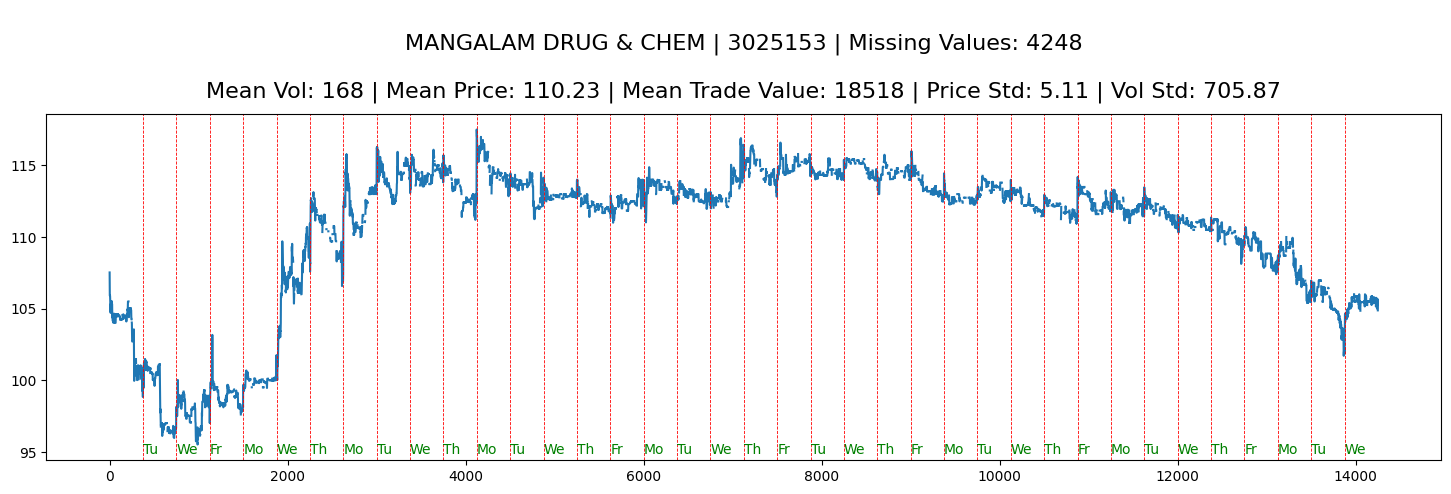

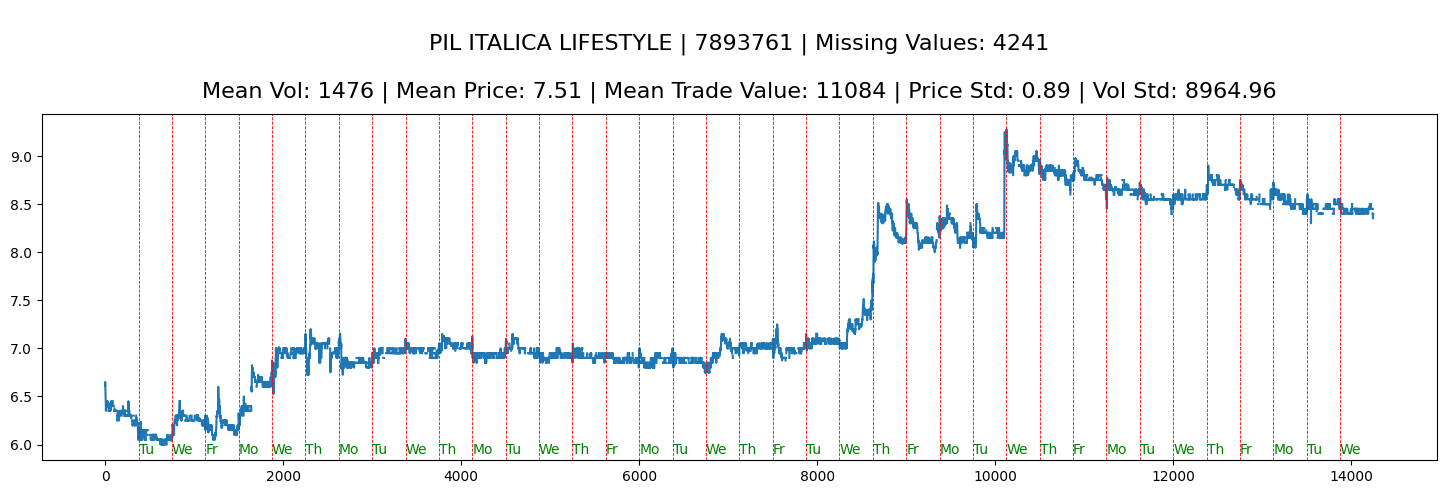

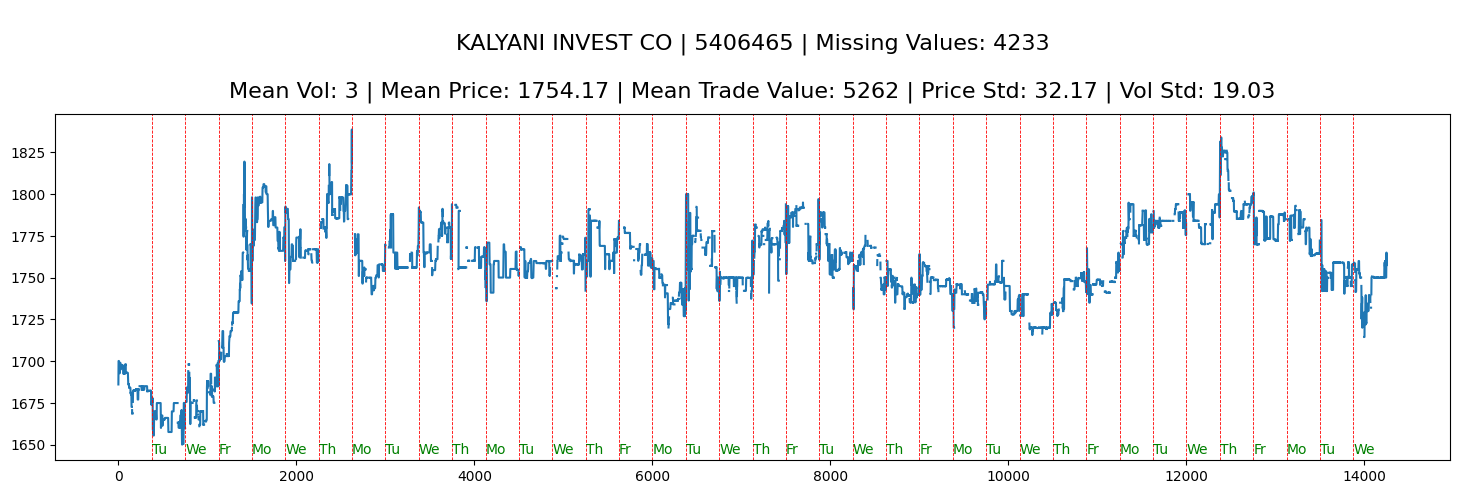

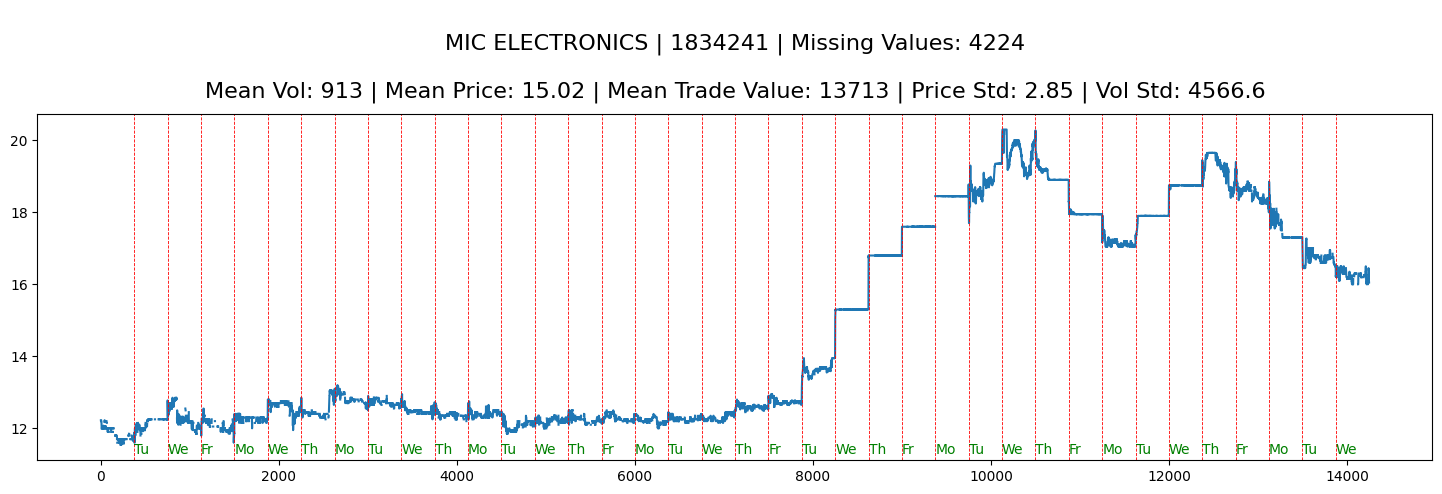

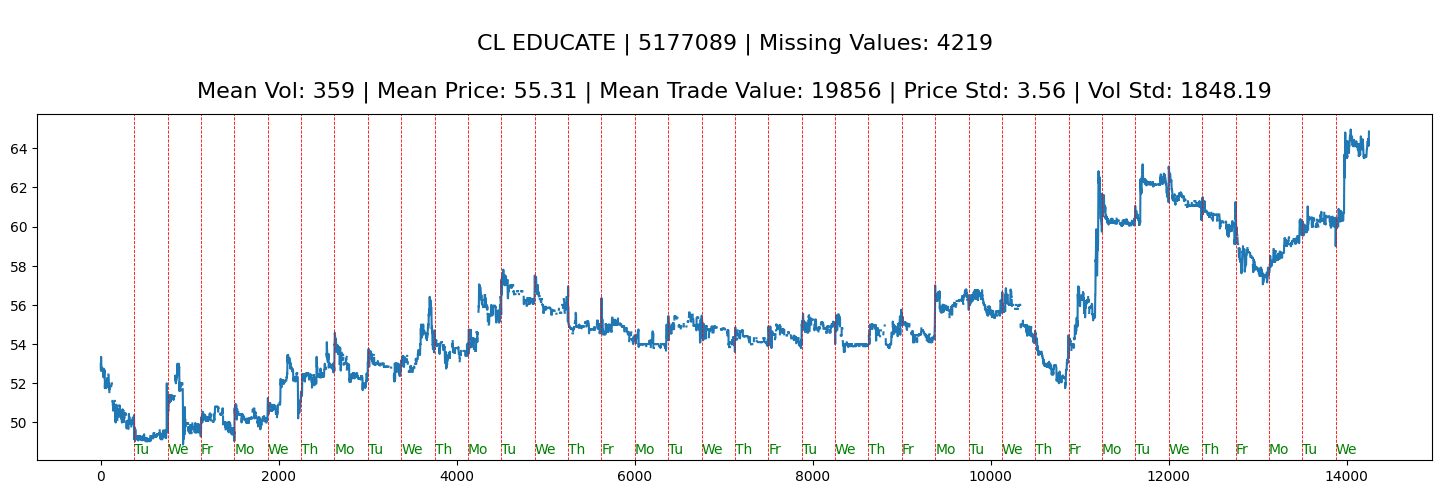

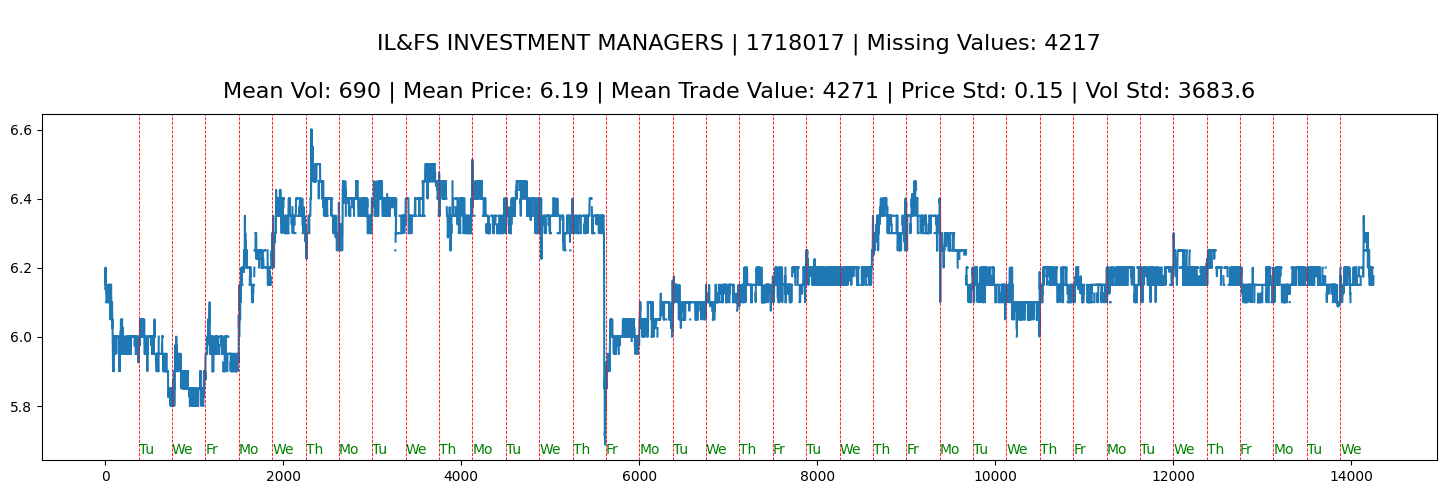

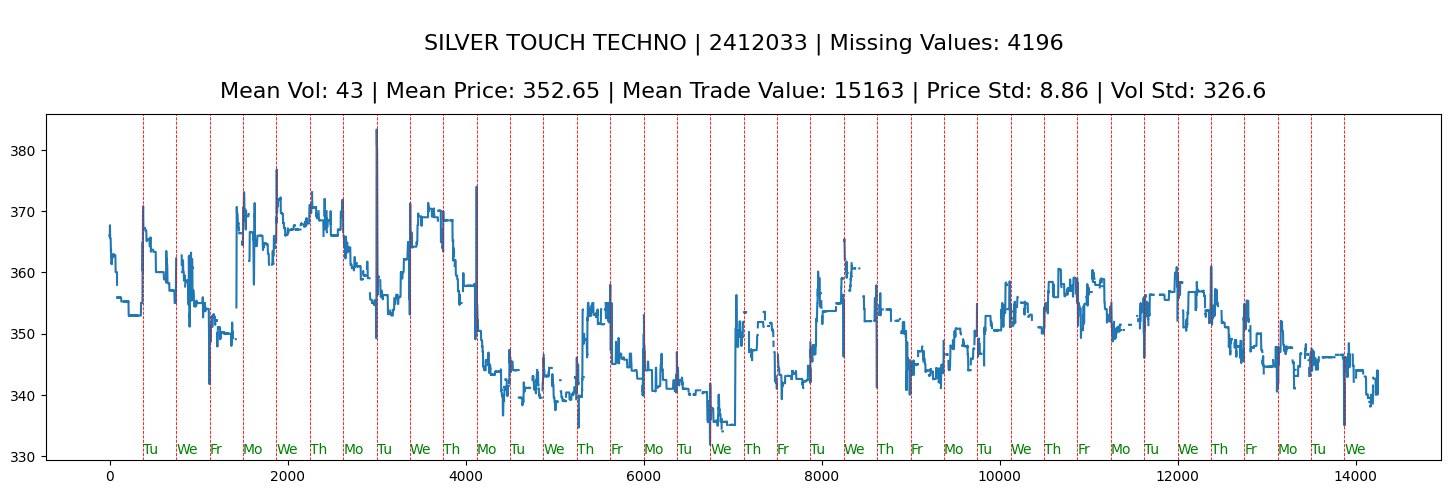

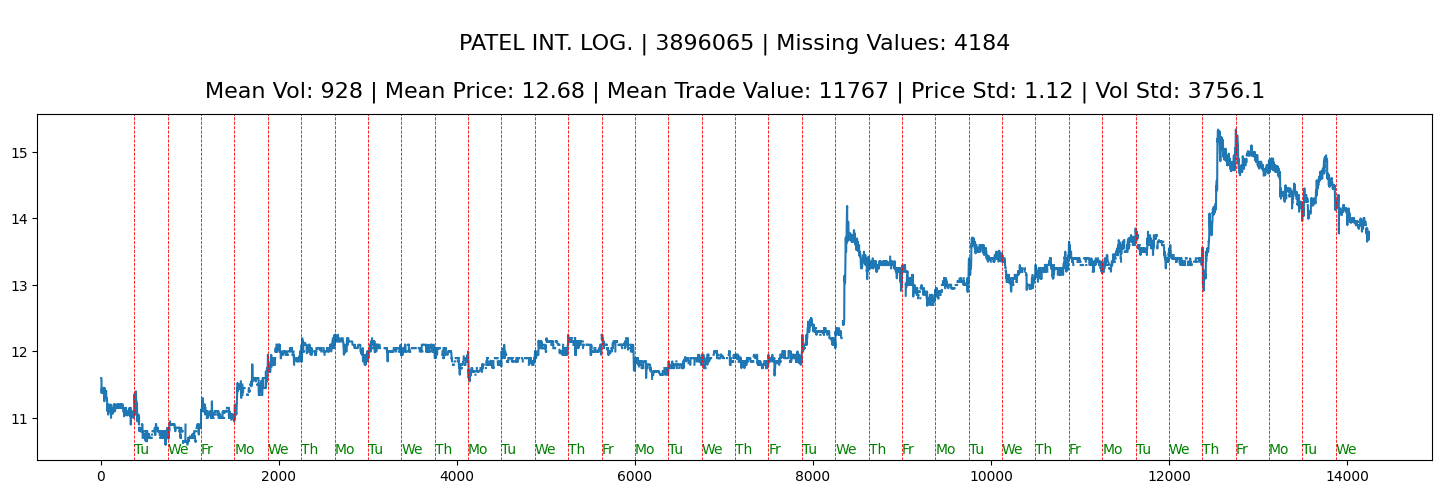

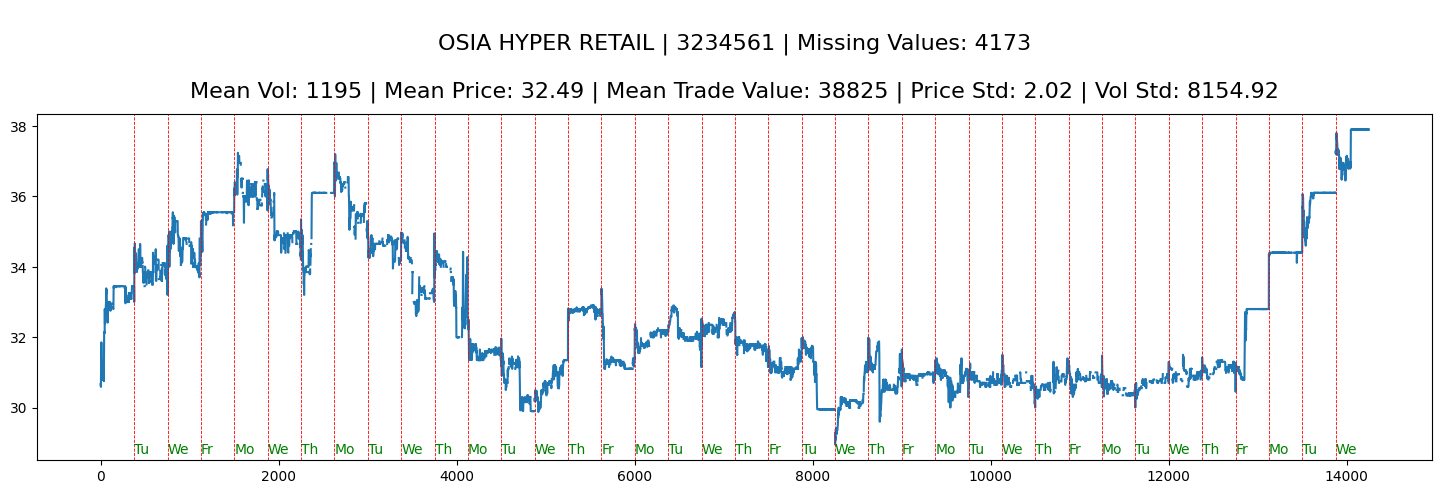

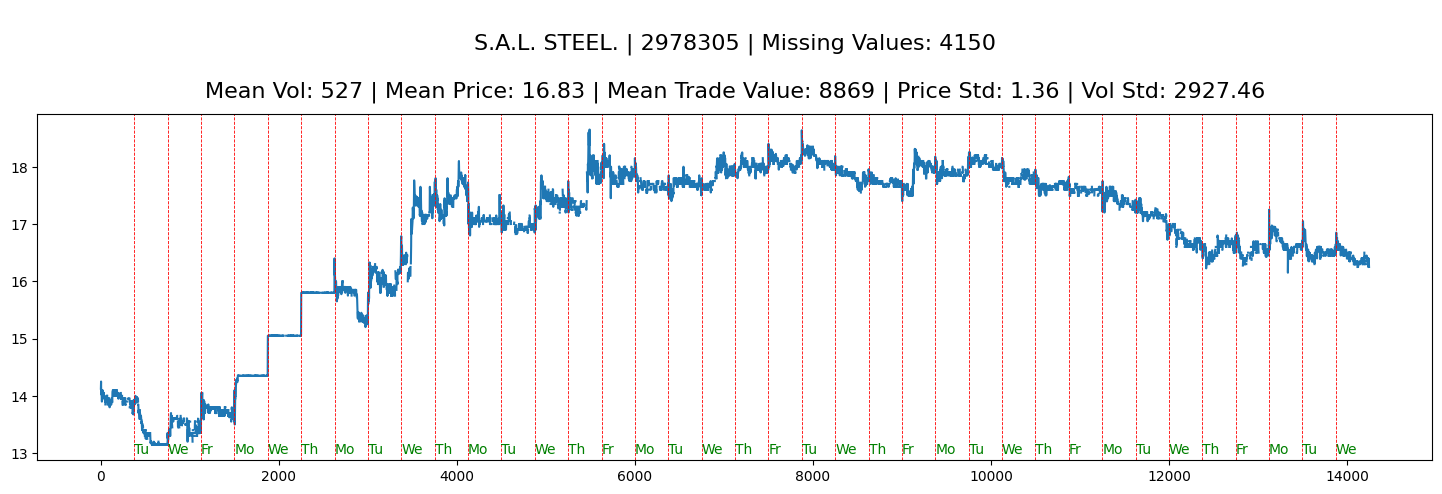

In [144]:
visuals.plot(samples=10, day_separation=1, name_start=None)